# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

**Jawab:**<br>
1. Inisialisasi jumlah cluster awal (bisa random atau pilih k=2). K adalah parameter yang mewakilkan angka dari cluster di mana data points akan dilakukan pengelompokan terhadap jumlah cluster yang ditentukan.
2. Tentukan posisi centroid secara random.
3. Hitung jarak antara data point ke centroid. Data point akan dianggap bagian dari cluster dengan centroid terdekatnya. Perhitungan jarak antara data point ke centroid menggunakan formula Euclidean Distance. 
4. Kemudian hitung ulang centroid berdasarkan label data didapatkan. Disini dibuat kembali centroid baru dan menghitung kembali jarak antar data poin ke centroid.
5. Kemudian dilakukan kembali tahap `3` dan dicek apakah ada perubahan dalam cluster atau tidak, jika ada maka dilakukan perulangan sebagaimana tahap `4` sampai posisi centroid tidak berubah lagi. 



---

---



---













---



Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [ ]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Cari Insight Berdasarkan Pengelompokan Usia

In [ ]:
df[(df.Umur > 17) & (df.Umur <= 30)].groupby('Jenis Kelamin').mean()

,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
Jenis Kelamin,,,
Laki-laki,23.444444,63.666667,51.805556
Perempuan,25.300000,56.000000,65.750000


In [ ]:
df[(df.Umur > 30) & (df.Umur <= 40)].groupby('Jenis Kelamin').mean()

,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
Jenis Kelamin,,,
Laki-laki,35.485714,75.114286,57.685714
Perempuan,34.291667,70.333333,62.875000


In [ ]:
df[(df.Umur > 40) & (df.Umur <= 50)].groupby('Jenis Kelamin').mean()

,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
Jenis Kelamin,,,
Laki-laki,46.470588,71.235294,31.000000
Perempuan,46.392857,62.892857,32.357143


In [ ]:
df[(df.Umur > 50) & (df.Umur <= 60)].groupby('Jenis Kelamin').mean()

,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
Jenis Kelamin,,,
Laki-laki,56.923077,59.923077,27.384615
Perempuan,55.133333,63.200000,31.600000


In [ ]:
df[(df.Umur > 60) & (df.Umur <= 70)].groupby('Jenis Kelamin').mean()

,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
Jenis Kelamin,,,
Laki-laki,66.909091,48.181818,42.545455
Perempuan,66.166667,53.333333,47.166667


In [ ]:
df.groupby('Jenis Kelamin').mean()

,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
Jenis Kelamin,,,
Laki-laki,39.575221,66.716814,46.460177
Perempuan,37.817518,63.102190,53.364964


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [ ]:
# hapus kolom tidak perlu
df.drop('ID_pelanggan', axis=1, inplace=True)

df.head()

,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,Laki-laki,19.0,15,39.0
1,Laki-laki,21.0,15,81.0
2,Perempuan,20.0,16,6.0
3,Perempuan,23.0,16,77.0
4,Perempuan,31.0,17,40.0


In [ ]:
# cek missing value
df.isnull().sum()

Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          4
dtype: int64

In [ ]:
# handle missing value
df.fillna(method='ffill', inplace=True)

df.isnull().sum()

Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64

In [ ]:
# cek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Jenis Kelamin               250 non-null    object 
 1   Umur                        250 non-null    float64
 2   Pendapatan pertahun (juta)  250 non-null    int64  
 3   Skor Belanja (1-100)        250 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.9+ KB


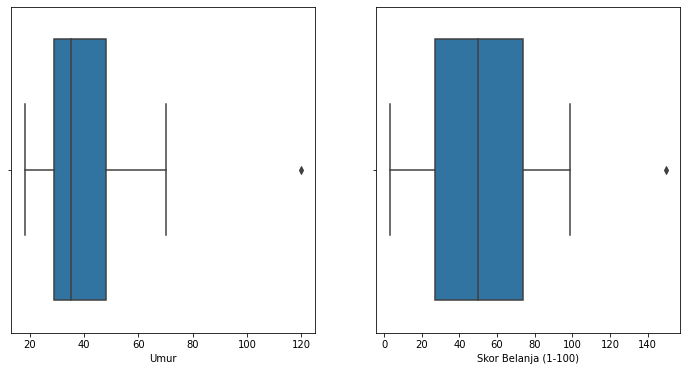

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
loop = ['Umur', 'Skor Belanja (1-100)'] # fokus pada variabel yang diminta pada soal

fig, ax = plt.subplots(ncols=2, figsize=(12,6))
ax = ax.flatten()

# cek outliers dengan boxplot
for i in range(len(loop)):
  sns.boxplot(data=df, x=loop[i], ax=ax[i])

plt.show()

In [ ]:
# import numpy as np

# def get_lower_upper_bound(x):
#   q1 = np.percentile(x, 25)
#   q3 = np.percentile(x, 75)
#   iqr = q3 - q1
#   lower = q1 - 1.5 * iqr
#   upper = q3 + 1.5 * iqr
#   return lower, upper

# def get_outliers_iqr(x):
#   lower, upper = get_lower_upper_bound(x)
#   return x[np.where((x < lower) | (x > upper))]

In [ ]:
# get_outliers_iqr(df2['Pendapatan pertahun (juta)'].values)

In [ ]:
# handle outliers dengan IQR method
df2 = df[loop]

Q1 = df2.quantile(.25)
Q3 = df2.quantile(.75)
IQR = Q3 - Q1
df2 = df2[(df2 > Q1-1.5*IQR) & (df2 < Q3+1.5*IQR)]

df2.dropna(axis=0, inplace=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 248
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Umur                  248 non-null    float64
 1   Skor Belanja (1-100)  248 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


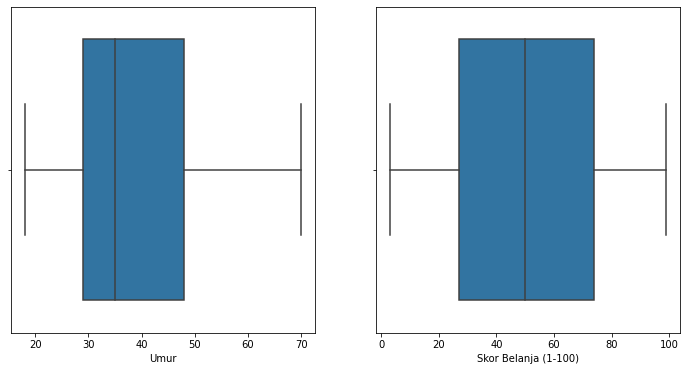

In [ ]:
# cek outliers kembali dengan boxplot
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
ax = ax.flatten()

for i in range(len(loop)):
  sns.boxplot(data=df2, x=loop[i], ax=ax[i])

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# proses standardisasi
sc = StandardScaler()
data_std = sc.fit_transform(df2)

# proses clustering
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(data_std)
labels1 = kmeans1.labels_

# mengubah data standardisasi ke dataframe
df_std = pd.DataFrame(data=data_std, columns=loop)
df_std['labels1'] = labels1

df_std.describe().round(4)

,Umur,Skor Belanja (1-100),labels1
count,248.0000,248.0000,248.0000
mean,0.0000,-0.0000,0.5081
std,1.0020,1.0020,0.5009
min,-1.5304,-1.6956,0.0000
25%,-0.7011,-0.8295,0.0000
50%,-0.2487,0.0006,1.0000
75%,0.7315,0.8667,1.0000
max,2.3901,1.7690,1.0000


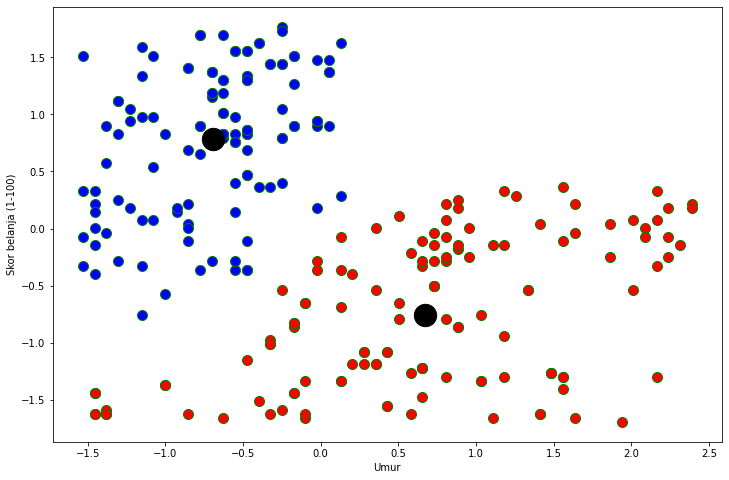

In [ ]:
# plotting hasil clustering
plt.figure(figsize=(12,8))
plt.scatter(df_std['Umur'][df_std.labels1 == 0], df_std['Skor Belanja (1-100)'][df_std.labels1 == 0], c='b', s=100, edgecolor='g')
plt.scatter(df_std['Umur'][df_std.labels1 == 1], df_std['Skor Belanja (1-100)'][df_std.labels1 == 1], c='r', s=100, edgecolor='g')

centers=kmeans1.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=500)
plt.xlabel('Umur')
plt.ylabel('Skor belanja (1-100)')
plt.show()

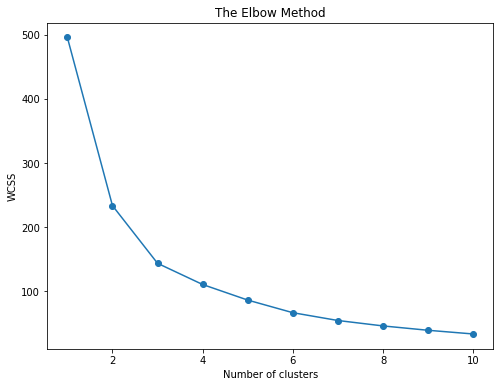

In [ ]:
# cek elbow method untuk menentukan nilai k optimal
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(data_std)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss, marker='o') # digunakan marker supaya lebih fokus melihat data point inersianya
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

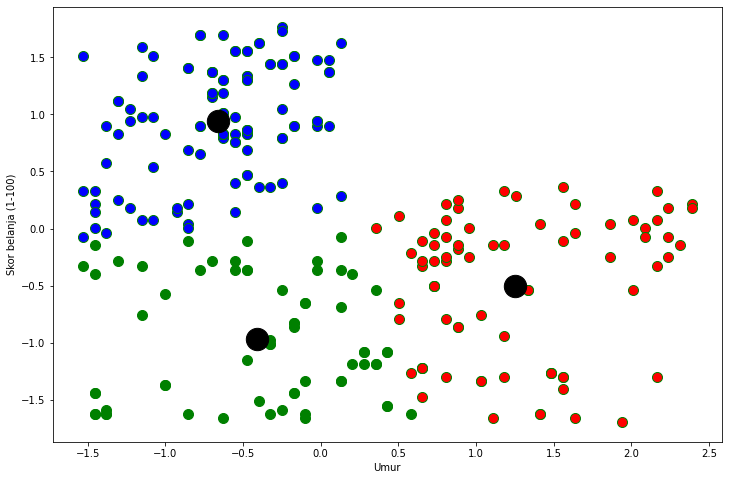

In [ ]:
# proses clustering kembali dengan k optimal dari pengamatan elbow method
kmeans2 = KMeans(n_clusters=3, random_state=42).fit(data_std)
labels2 = kmeans2.labels_

df_std['labels2'] = labels2

# plotting hasil clustering
plt.figure(figsize=(12,8))
plt.scatter(df_std['Umur'][df_std.labels2 == 0], df_std['Skor Belanja (1-100)'][df_std.labels2 == 0], c='g', s=100, edgecolor='g')
plt.scatter(df_std['Umur'][df_std.labels2 == 1], df_std['Skor Belanja (1-100)'][df_std.labels2 == 1], c='r', s=100, edgecolor='g')
plt.scatter(df_std['Umur'][df_std.labels2 == 2], df_std['Skor Belanja (1-100)'][df_std.labels2 == 2], c='b', s=100, edgecolor='g')

centers=kmeans2.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=500)
plt.xlabel('Umur')
plt.ylabel('Skor belanja (1-100)')
plt.show()

In [ ]:
# menghitung ketepatan clustering
from sklearn.metrics import silhouette_score

silhouette_score(df_std, labels=labels1), silhouette_score(df_std, labels=labels2)

(0.5245622611810248, 0.5816811722567546)

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

**Jawab:**<br>
Pada hasil clustering didapatkan 3 kelompok, di mana kelompok Hijau yang merupakan pelanggan berusia dewasa muda dengan skor belanja yang cukup rendah. Kemudian kelompok Merah merupakan pelanggan dengan usia dewasa lanjut namun skor belanjanya dalam rentang menengah hingga menengah. Terakhir ada kelompok Biru yang merupakan pelanggan dengan usia yang masih tergolong dewasa muda nammun skor belanjanya cukup tinggi. Berdasarkan hasil insight dengan grouping yang dilakukan ditambah juga hasil clustering tersebut dapat diketahui bahwa pelanggan dengan usia 20-40an merupakan pelanggan yang juga memiliki pendapatan yang cukup tinggi dan selaras dengan skor belanja mereka yang juga tinggi. Keseluruhan data juga memperlihatkan skor belanja yang dimiliki oleh perempuan selalu lebih tinggi dibandingkan laki-laki. Sehingga untuk kemajuan supermarket dapat menarik pelanggan dengan usia 20-40an berjenis kelamin wanita sebagai target utama mereka.